In [141]:
%matplotlib inline

import matplotlib.pyplot as plt
import math

# Threshold for value iteration
THETA = 1e-4
# Floating point comparisons
EPSILON = 1e-4
# The coin's p(head)
P_HEAD = 0.4

In [142]:
v = {}
for s in range(1, 100):
    v[s] = 0

v[0] = 0
v[100] = 1

In [143]:
delta = float("inf")
while delta > THETA:
    delta = 0
    for s in range(1, 100):
        v_old = v[s]
        vs = []
        for a in range(0, min(s, 100 - s) + 1):
            vs.append(P_HEAD * v[s + a] + (1 - P_HEAD) * v[s - a])
        v[s] = max(vs)
        delta = max(delta, abs(v[s] - v_old))

In [144]:
# for s in range(1, 100):
#     print(f"v[{s}] = {v[s]}")

In [145]:
pi = {}
for s in range(1, 100):
    qs = []
    for a in range(1, min(s, 100 - s) + 1):
        q = P_HEAD * v[s + a] + (1 - P_HEAD) * v[s - a]
        qs.append((a, q))
    a_tied = []
    q_max = -float("inf")
    for a, q in qs:
        if q > q_max + EPSILON:
            a_tied = [a]
            q_max = q
        elif math.isclose(q, q_max, abs_tol=EPSILON):
            a_tied.append(a)
    # Arbitrary tiebreaker here!
    # pi[s] = a_tied[0]
    # pi[s] = max(a_tied)
    pi[s] = min(a_tied)

    # print(f"pi[{s}] = {pi[s]}")

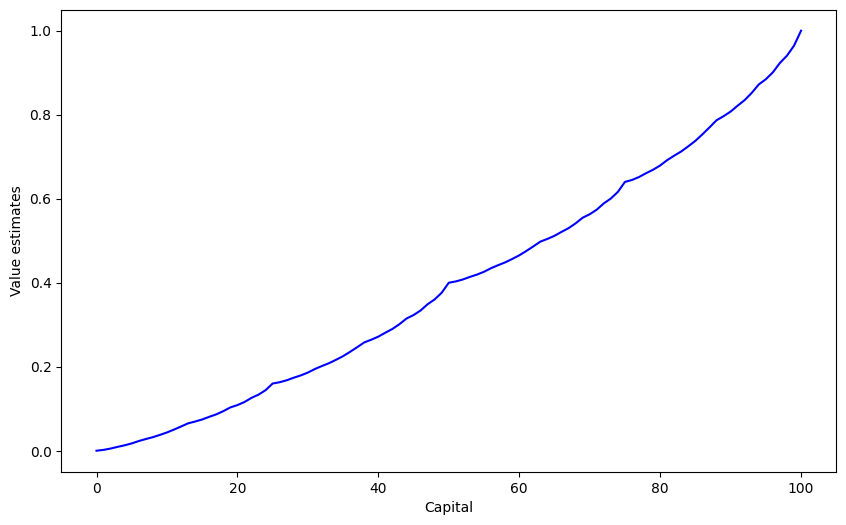

In [146]:
states = list(range(0, 101))
values = [v[s] for s in states]
plt.figure(figsize=(10, 6))
plt.plot(states, values, color="b")
plt.xlabel("Capital")
plt.ylabel("Value estimates")
plt.show()

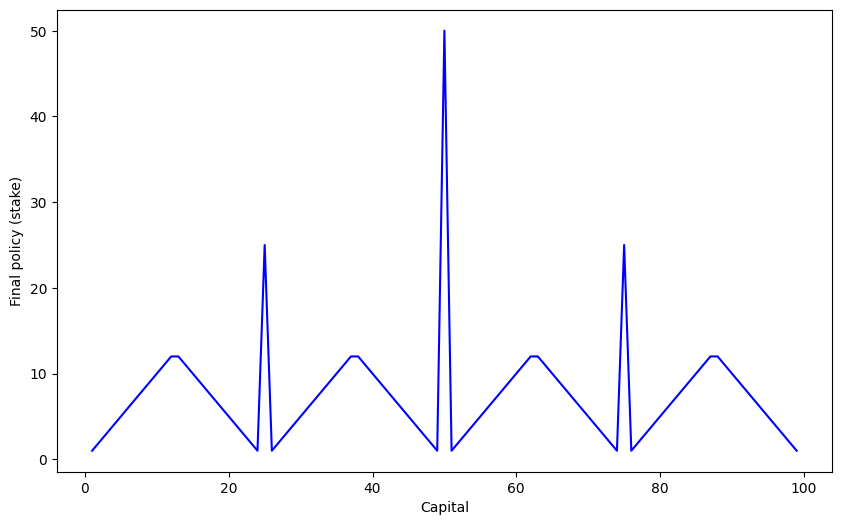

In [147]:
states = list(range(1, 100))
policies = [pi[s] for s in states]
plt.figure(figsize=(10, 6))
plt.plot(states, policies, color="b")
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()